<a href="https://colab.research.google.com/github/ulialiau22/hometask-for-DA-school/blob/main/HW4__Julia_Dmitrieva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Задание
# Основная часть
# Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
# Используйте также описательные статистики
# У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт
# Описания полей
# age возраст
# gender пол repexc_date
# city_type Тип города проживания клиента
# full_mob Длительность взаимоотношений с банком

# ml_balance ипотека

# cl_balance_0m потребительский кредит
# loan_balance_0m все кредиты

# td_balance_0m депозит

# casa_balance_0m счета

# dc_trx_cnt количество трат по картам

# dc_trx_sum сумма трат по картам
# Avg_trx средний размер транзакции
# avgtrx_to_balance
# min_casa_balance_1q показатели по счетам за квартал
# max_casa_balance_1q
# avg_casa_balance_1Y показатели по счетам за год

# min_td_balance_1q

# max_td_balance_1q
# avg_td_balance_1Y

# min_loan_balance_1q

# max_loan_balance_1q
# avg_loan_balance_1Y

# min_cl_balance_1q

# max_cl_balance_1q
# avg_cl_balance_1Y
# loan_to_deposit

# income доход клиента

# nbi доход от клиента без OPEX

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
import missingno

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ulialiau22/python-for-data-analytics/main/Lesson4/hometask/test_cluster.csv',
                 encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [ ]:
len(df)

50000

In [ ]:
df = df.rename(columns={'full_mob': 'time_with_bank', 'ml_balance': 'ipoteka', 'dc_trx_sum': 'sum costs'})
df

,age,gender,city_type,time_with_bank,ipoteka,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.0000,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3272.9367,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6249.7550,6,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,14354.9370,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,91511.7691,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,F,<100,97,0.0,0.0,0.00,1247018.0,0.8800,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,13775.933155
49996,58,F,Mega,34,0.0,0.0,0.00,1000000.0,0.0000,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,8247.466438
49997,34,М,1M+,21,0.0,0.0,0.00,0.0,6450.9300,73,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128710
49998,43,М,<100,52,0.0,0.0,39318.52,0.0,4101.1200,0,...,39318.52,48453.57,63442.406667,0.0,0.0,0.0,NaN,NaN,NaN,5101.543269


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

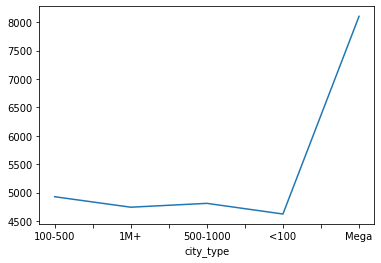

In [ ]:
df_2 = df.groupby(['city_type'])['Avg_trx'].mean()
df_2.plot()

In [ ]:
x = df['nbi']
y = df['time_with_bank']


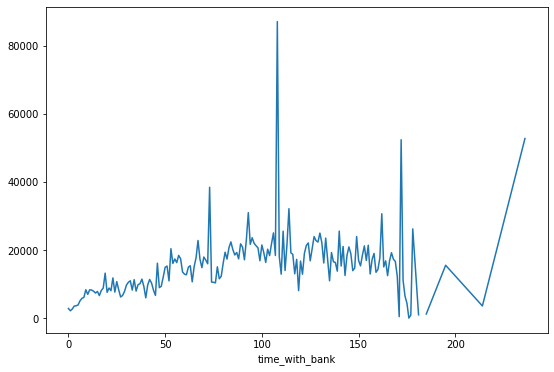

In [ ]:
df_3 = df.groupby(['time_with_bank'])['nbi'].mean()
from pylab import rcParams
rcParams['figure.figsize'] = 9,6
df_3.plot()

In [ ]:
loan_in_city = df.set_index('city_type')['loan_balance_0m']
loan_in_city.head()

city_type
<100    0.0
Mega    0.0
Mega    0.0
Mega    0.0
Mega    0.0
Name: loan_balance_0m, dtype: float64

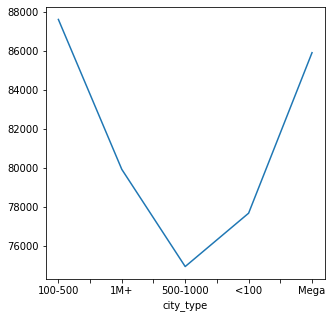

In [ ]:
df_4 = df.groupby(['city_type'])['loan_balance_0m'].mean()
rcParams['figure.figsize'] = 5,5
df_4.plot()